In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import astropy.units as u
#import astro astropy.units import conts as const

#### The gyroradius is the radius of circular motion of charged particle in the presence of a uniform magnetic field. 

It can be obtained from centripetal force $F = \frac{mv^2}{r}$ and Lorentz force (for magnetic field only) $F = q[v,B]$.  
If we equate both parts and consider the simplest case of only one component of velocity and only perpendicular magnetic field, we will go from vector equations to much simpler one:

$\frac{m{v_{\perp}}^2}{r} = q v_{\perp} B_z $, that will lead us to the gyroradius -> $r_g = \frac{mv_{\perp}}{qB_z}$



**To switch to the relativistic case need to use relativistic mass $m_{rel} = \gamma m_0 $. Finally our gyroradius can be found as:**

$r_g = \frac{\gamma m_0v_{\perp}}{qB_z}$

$\gamma m_0v_{\perp} = p_{\perp} = E/c$ from the relativistic  energy-momentum relation: $E^2 = (pc)^2 + (m_0c^2)^2$. For ultra relativistic case we can neglect second part, therefore $E = pc$

Let's now take a look at the units:

$r_g = \frac{p (GeV/c)}{q(elementary charges) \times B(Tesla)} $

Or simply:

$r_g = \frac{E (GeV)}{q(elementary charges) \times B(Tesla)} \times 1 / c $

Need carefully add here transfer from GeV to Joule ($1 GeV = 1.602 \times 10^{-10} Joules$), and multiply by all constants to get the convenient expression for gyroradius in meters:

$(r_g / meters) = 3.3 \times \frac{(E/GeV)}{(q/ elementary charges) \times (B/Tesla)} $ - this equation is in agreement with equation for relativistic [gyroradius from wikipedia](https://en.wikipedia.org/wiki/Gyroradius)




In [5]:
def gyroradius(energy, m_field, charge):
    """ 
    Calculate gyroradius of relativistic particle
    ---------
    Arguments:
    
    energy : GeV
        energy of the particle
    m_field : T
        perpendicular magnetic field
    charge : in electron charges
        charge of the particle
    """
    rg = 3.3 * (energy/m_field) * (1/charge)
    return rg


def plot_gyroradius_traj(energy,m_field,charge):
    """ 
    This function calculates and plots trajectory of particle that is moving in the X-direction with energy=energy,
    and in perpendicular magnetic field in Z-direction B=m_field.
    --------
    Arguments:
    
    energy : GeV
        energy of the particle
    m_field : T
        perpendicular magnetic field
    charge : in electron charges
        charge of the particle
    """
    
    fig, ax = plt.subplots(figsize = (12,6))
    
    # Calculate gyroradius of the particle
    radius = 3.3 * (energy/m_field) * charge
    center = (0, -radius)  # Center of the circle
    
    # Create circle and add to the plot
    circle = plt.Circle(center, radius, color='r', fill=False)
    ax.add_patch(circle)

    plt.ylim(-0.2,0.2)
    plt.xlim(0,1)
    plt.xlabel("X-axis (direction of movement) [meters]")
    plt.ylabel("Y-axis [meters]")
    plt.grid(alpha=0.5)
    plt.show()


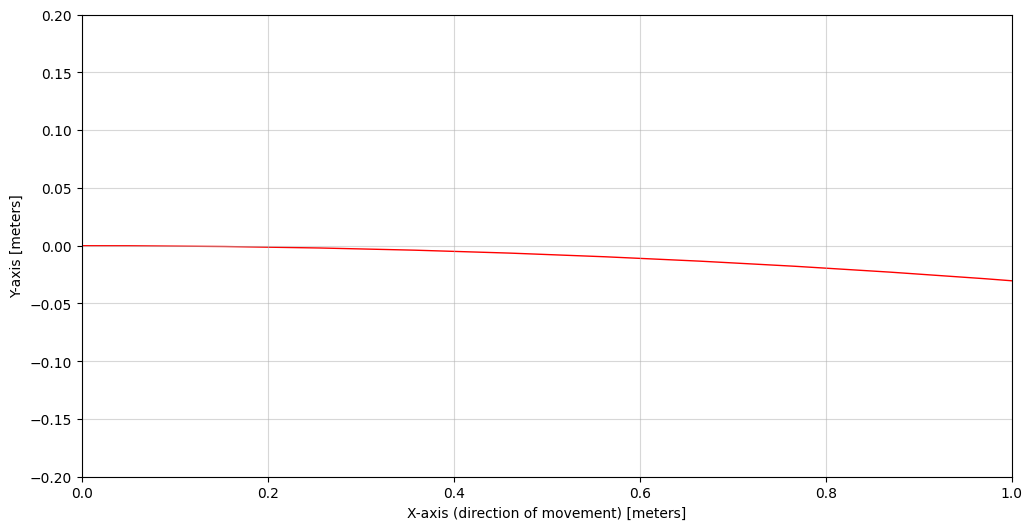

In [7]:
# Lets make a plot for the electron with energy 1 GeV in magnetic field 1 T
plot_gyroradius_traj(energy=25,m_field=5, charge=1)

#### Lets also simulate the whole process of movement of charged particle in the perpendicular magnetic field

As far as we apply force only in perpendicular direction, the speed of particle doesn't change, and therefore it undergo circular motion with constant radius $r_g$, 

and so-called cyclotrone frequency:

$\omega_{c} = \frac{|q|B}{\gamma m}$

Using this expression, the position of particle at time $t$ can be calculated using the parametric equations of a circle:

$x(t) = r_g cos(\omega_c t + \phi)$

$y(t) = r_g sin(\omega_c t + \phi)$

with phase angle $\phi$ = 0.

We can express the frequency as $\omega_c = c / r_g$

In [2]:
def calculate_traj(gyroradius):
    """
    Calculates circular trajectory of the particle based on the gyroradius
    -----
    Arguments:
        gyroradius (m): gyro radius of particle

    Returns:
        list (numpy array) : list with x and y coordiantes
    """
    t = 1
    dt = 0.0001/gyroradius # divide by gyroradius to have always smooth line
    x_array = []
    y_array = []
    for t in np.arange(0,t,dt):
        x_array.append((gyroradius * math.cos((3e8/gyroradius)*t)))
        y_array.append(gyroradius * math.sin(((3e8/gyroradius))*t)-gyroradius)
    plt.grid(alpha=0.5)
    plt.xlabel("meters")
    plt.ylabel("meters")
    plt.xlim(0,1)
    plt.ylim(-0.1,0.1)
    plt.scatter(x_array,y_array, s = 0.5)
    return np.array([x_array, y_array])

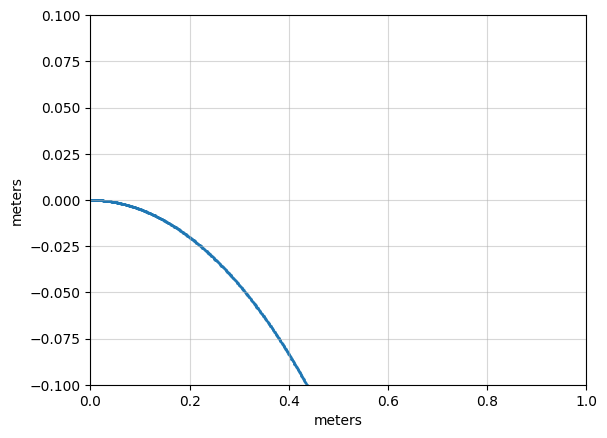

In [ ]:
result = calculate_traj(1)

In [3]:
test = []
test.append(1*u.m)
test

NameError: name 'u' is not defined

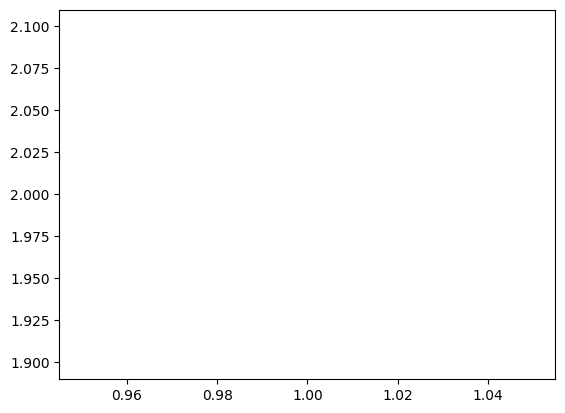

In [ ]:
plt.plot(u.Quantity(1*u.m), u.Quantity(2*u.m))

In [ ]:
u.Quantity(1*u.m)

<Quantity 1. m>

In [ ]:
np.array([1*u.m]).to_value()

TypeError: only dimensionless scalar quantities can be converted to Python scalars